### Sprint 8 Project

### Summary:
This project is mainly about the topic of 'Supervised Learning'.  In this project, the main concern is that the Beta Bank customers are slowly leaving every month. The goal is to create a model to predict whether or not a customer will leave the bank soon.  In this project, I decided to use the algorithims: Logistic Regression, Decision Tree, Random Forest, XG Boost, and Naive Bayes.  The methods that I used to address the class imbalance in the dataset are: threshold adjustment, upsampling, and downsampling.

### Importing the Necessary Libraries and Uploading the Dataframe

In [1]:
#Import the necessary libraries.
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

from sklearn.utils import shuffle

from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier

import numpy as np

import xgboost as xgb

from sklearn.naive_bayes import GaussianNB


In [2]:
#Upload dataset. Use a try and except clause in order to upload the dataset on two different file paths (local and non-local computer).
try:
    df = pd.read_csv('Churn.csv')
except:
    df = pd.read_csv('/datasets/Churn.csv')

In [3]:
#Print the first five rows of the dataset and search for any errors.
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Code Observation:
The rows of the df dataframe appear to be listed correctly, but the columns should be changed from uppercase font to lowercase font.

### Data Preprocessing and Data Cleaning

In [4]:
#Rename the column names using the rename() method.
df = df.rename({"RowNumber": 'row_number', "CustomerId": "customer_id", "CreditScore": "credit_score", "Geography": "geography", "Gender": "gender", "Age": "age", "Tenure": "tenure", "Balance": "balance", "NumOfProducts": "num_of_products", "HasCrCard": "has_cr_card", "IsActiveMember": "is_active_member", "EstimatedSalary": "estimated_salary", "Exited": "exited", "Surname": "surname"}, axis=1)

In [5]:
#Use the info() method to check the data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            9091 non-null   float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Code Observation: 
It appears that the columns of the df dataframe all have the appropriate data types.

In [6]:
# Use the isna() and sum() methods to check of missing values.
df.isna().sum()

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

Code Observation:
There are 909 missing values noted in the tenure column of the dataset.  These values are small enough to be deleted/ dropped.

In [7]:
#Use the dropna() function to drop the missing values in the tenure column of the dataframe.
df = df.dropna(subset=['tenure'])

In [8]:
#Use the isna() and sum() methods once again in order to double check for missing values.
df.isna().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

Code Observation:
There are no more missing values noted in the dataframe.  The missing values in the tenure column were dropped successfully.

In [9]:
#Use the duplicated() and sum() methods in order to check for duplicate values in the dataset.
df.duplicated().sum()

0

Code Observation:  
There are no duplicate values noted in the df dataframe.

### Feature and Target Preparation

In [10]:
#Create the features dataframe by dropping all the uneeded columns in the dataframe.  Especially the 'exited' column which will be used as the target.
features = df.drop(['exited','row_number', 'customer_id', 'surname'], axis=1)

In [11]:
#Use one hot encoding technique to encode the 'geography' and 'gender' columns.
features = pd.get_dummies(features, columns=['geography', 'gender'], drop_first=True)

Code Rationale:
In addition to the 'exited' column, I also decided to drop the: 'row_number', 'customer_id', 'surname' columns because they consisted of data that would not be relevant to the models' predictions.

In [12]:
#Create the target dataframe which contains the only the 'exited' column of the dataframe.
target = df['exited']

In [13]:
# Use the train_test_split() function in order to split the features and target dataframes according to a: 60/20/20 ratio.
features_train, features_valid_test, target_train, target_valid_test = train_test_split(features, target, test_size=0.4, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(features_valid_test, target_valid_test, test_size=0.5, random_state=12345)

### Class Imbalance

In [14]:
#Use the value_counts() method in order to count values of the classes in the exited column of the dataset.
count_class = df['exited'].value_counts()

count_class

exited
0    7237
1    1854
Name: count, dtype: int64

Code Observation:
According to the code result, there appears to be a class imbalance in the exited column of the dataset, which consists of: the '0' class (total count: 7237) outnumbering the '1' ckass (total_count: 1854).

In [15]:
#Use the len() fuction in order to calculate the percentage of each class when compared to the whole dataset.
proportion_class = count_class/ len(df)

proportion_class

exited
0    0.796062
1    0.203938
Name: count, dtype: float64

Code Observation:
According to the code result, it appears that the '0' class comprises approximately 80% of the entries in the dataset and the '1' class comprises approximately 20% of the dataset.

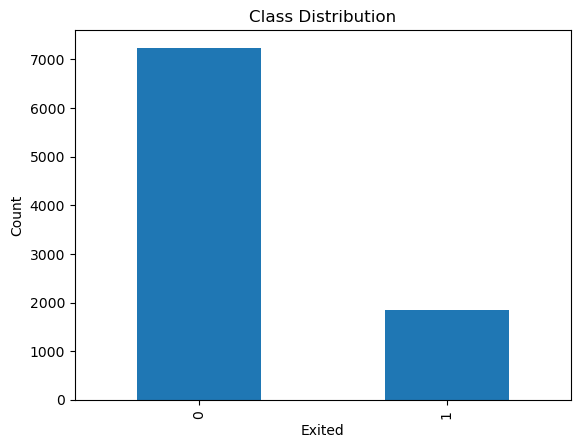

In [16]:
#Use the matplotlib library in order to make a bar chart of the class imbalance in the dataset.
count_class.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

Code Observation:
According to the bar chart above, the 0 class which consists of 7,237 entries, has 5,383 more entries than the 1 class, which consists of 1,854 entries.  Thus, the 0 class greatly outnumbers the 1 class with an  approximately 8:2 ratio.

### Models Tested Without Accounting for Class Imbalance

#### Logistic Regression (Not Accounting for Class Imbalance)

In [17]:
#Create the first model using the Logistic Regression algorithim.
model_1 = LogisticRegression(random_state=818)

In [18]:
#Create the parameter grid for the Logistic Regression algorithim.
param_grid_lr ={
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

In [19]:
#Use GridSearchCV in order to create a grid search for the Logistic Regresion model.
grid_search_lr = GridSearchCV(estimator=model_1, param_grid=param_grid_lr, cv=5, scoring='accuracy')

In [20]:
#Use the fit() method in order to train the gridsearch model, using the features and target values of the training set.
grid_search_lr.fit(features_train, target_train)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=818),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [21]:
#Print out the best parameter and the best score for the Logistic Regression model, using the best_params() and the best_score() methods.
lr_best_params = grid_search_lr.best_params_

lr_best_score = grid_search_lr.best_score_

print("Best Parameters:", lr_best_params)
print("Best Score:", lr_best_score)

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8052809054902916


Code Observation:
It appears the best parameters for the Logistic Regression model are: C=1, penalty='l1' and solver='liblinear'.
The best score for the Logistic Regression model is approximately 0.80.

In [22]:
#Create the code for the Logistic Regression model once again using the parameters from GridSearchCV().
model_1 = LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=12345)

In [23]:
#Use the fit() method in order to train the Logistic Regression model with the features and target values from the training set.
model_1.fit(features_train, target_train)

LogisticRegression(C=1, penalty='l1', random_state=12345, solver='liblinear')

In [24]:
#Use the score() method in order to calculate the accuracy score of the Logistic Regression model when being used on the
#training and validation sets.
lr_score_train = model_1.score(features_train, target_train)

lr_score_valid = model_1.score(features_valid, target_valid)

In [25]:
#Print out the Logistic Regression Model's accuracy score from the training and validation sets.
print("Logistic Regression Training Set Accuracy Score:", lr_score_train)

print("Logistic Regression Validation Set Accuracy Score:", lr_score_valid)

Logistic Regression Training Set Accuracy Score: 0.8056472313898057
Logistic Regression Validation Set Accuracy Score: 0.8091309130913091


Code Observations:
The Logistic Regression Model's accuracy score from the training set is approximately 0.80.  The Logistic Regression model's accuracy score from the validation set is approximately 0.80.  Both accuracy scores are fairly good

In [26]:
#Use the predict() method and the features_valid variable on the Logistic Regression Model 
# in order to predict the target of a new set of data.
prediction_1 = model_1.predict(features_valid)

In [27]:
#Use the f1_score() method to calculate the f1 score of the Logistic Regression model.
lr_f1_score = f1_score(target_valid, prediction_1)

print("Logistic Regression F1 Score:", lr_f1_score)

Logistic Regression F1 Score: 0.3073852295409182


Code Observation:
The f1_score of the Logistic Regression Model is 0.30 which is a poor/low f1 score.

#### Decision Tree (Not Accounting for Class Imbalance)

In [28]:
#Use DecisionTreeClassifier() in order to create a model using the Decision Tree Algorithim.
model_2 = DecisionTreeClassifier(random_state=213)

In [29]:
#Create a parameter grid for the Decision Tree model.
dt_param_grid = {
    'max_depth': [2, 4, 6, 8, 10, 12, 15],
    'min_samples_split': [2, 5, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']}

In [30]:
#Use GridSearchCV() in order to find the best hyperparameters for the Decision Tree model.
dt_gridsearch = GridSearchCV(estimator=model_2, param_grid=dt_param_grid, cv=5, scoring='accuracy')

In [31]:
#Use the fit() method in order to train the GridSearchCV() model with the features and target values from the training set.
dt_gridsearch.fit(features_train, target_train)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
280 fits failed out of a total of 840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
280 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\util

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=213),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [32]:
#Use the best_params_() and best_score_() methods in order to find the best hyperparameters and the best score for the
#Decision Tree model.
dt_best_params = dt_gridsearch.best_params_

dt_best_score = dt_gridsearch.best_score_

In [33]:
#Print the results for the best hyperparameters and the best score for the Decision Tree model.
print("Decision Tree Best Parameters:", dt_best_params)

print("Decision Tree Best Score:", dt_best_score)

Decision Tree Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 10}
Decision Tree Best Score: 0.8357172529200547


Code Observation:
It appears that the best hyperparameters for the Decision Tree model are: criterion='entropy', max_depth=8, max_features='sqrt'
and min_samples_split=10.
The best score for the Decision Tree model, according to GridSearchCV(), is approximately 0.83.

In [34]:
#Recreate the code for the Decsion Tree model using the hyperparameters from GridSearchCV().
model_2 = DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='sqrt', min_samples_split=10, random_state=12345)

#Use the fit() method in order to train the Decision Tree Model with the features and the target values from the the training set.
model_2.fit(features_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       min_samples_split=10, random_state=12345)

In [35]:
#Use the score() method in order to calculate the accuracy scores of the Decision Tree model using the training set and the
#validation set.
dt_score_train = model_2.score(features_train, target_train)

dt_score_valid = model_2.score(features_valid, target_valid)

In [36]:
#Print the Decision Tree Model's accuracy score of the training set and the validation set.
print("Decision Tree Training Set Accuracy Score:", dt_score_train)

print("Decision Tree Validation Set Accuracy Score:", dt_score_valid)

Decision Tree Training Set Accuracy Score: 0.8595526219288595
Decision Tree Validation Set Accuracy Score: 0.8404840484048405


Code Observation:
The Decision Tree Model's accuracy score from the training set is: approximately 0.85.  The Decision Tree Model's accuracy score from
the validations set is: approximately: 0.84.  Both accuracy scores are fairly good.

In [37]:
#Use the predict() method and the features_valid variable on the Decision Tree model in order to predict the target value
# of a set of new data.
prediction_2 = model_2.predict(features_valid)

In [38]:
#Calculate the f1 score of the Decision Tree model using the f1_score() method.
dt_f1_score = f1_score(target_valid, prediction_2)

print("Decision Tree F1 Score:", dt_f1_score)

Decision Tree F1 Score: 0.4876325088339223


Code Observation:
It appears the the F1 score of the Decision Tree model is: approximately 0.48, which is a fairly poor/low f1 score.

#### Random Forest Model(Not Accounting for Class Imbalance)

In [39]:
#Use RandomForestClassifier() in order to create a model using the Random Forest Algorithim.
model_3 = RandomForestClassifier(random_state=12345)

In [40]:
#Create a parameter grid for the Random Forest model.
rf_param_grid = {'n_estimators': [25, 50, 100],
                 'max_depth': [3, 5, 7],
                 'min_samples_split': [2, 5],
                 'max_features': ['auto', 'sqrt']
    
}

In [41]:
#Use RandomizedSearchCV() in order to find the best hyperparameters for the Random Forest model.
rf_randomized_search = RandomizedSearchCV(estimator=model_3, param_distributions=rf_param_grid, n_iter=20, cv=5, scoring='accuracy', random_state=12345)

In [42]:
#Use the fit() method in order to train the RandomizedSearchCV() model with the features and target values from the training set.
rf_randomized_search.fit(features_train, target_train)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
55 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
                   n_iter=20,
                   param_distributions={'max_depth': [3, 5, 7],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [25, 50, 100]},
                   random_state=12345, scoring='accuracy')

In [43]:
#Use the best_params_() and best_score_() methods in order to find the best hyperparameters and the best score for the
#Random Forest model.
rf_best_params = rf_randomized_search.best_params_
rf_best_score = rf_randomized_search.best_score_


#Print the results for the best hyperparameters and the best score for the Random Forest model.
print("Random Forest Model Best Paramaeters:", rf_best_params)
print("Random Forest Model Best Score:", rf_best_score)

Random Forest Model Best Paramaeters: {'n_estimators': 100, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 7}
Random Forest Model Best Score: 0.8575347925899142


Code Observation:
It appears that the best hyperparameters for the Random Forest model are: n_estimators=100, min_samples_split=2, max_features='sqrt', and max_depth=7.
The best score for the Random Forest model, according to RandomizedSearchCV(), is approximately 0.85.

In [44]:
#Recreate the code for the Random Forest model using the hyperparameters from RandomizedSearchCV().
model_3 = RandomForestClassifier(n_estimators=100, min_samples_split=2, max_features='sqrt', max_depth=7, random_state=12345)

#Use the fit() method in order to train the Random Forest Model with the features and the target values from the the training set.
model_3.fit(features_train, target_train)

RandomForestClassifier(max_depth=7, random_state=12345)

In [45]:
#Use the score() method in order to calculate the accuracy scores of the Decision Tree model using the training set and the
#validation set.
m3_train = model_3.score(features_train, target_train)
m3_valid = model_3.score(features_valid, target_valid)

#Print the Decision Tree Model's accuracy score of the training set and the validation set.
print(f"Random Forest Model's (Without Accounting for Class Imbalance) Accuracy Score for training set:\n{m3_train}")
print(f"Random Forest Model's (Without Accounting for Class Imbalance) Accuracy Score for validation set:\n{m3_valid}")

Random Forest Model's (Without Accounting for Class Imbalance) Accuracy Score for training set:
0.8742207554088742
Random Forest Model's (Without Accounting for Class Imbalance) Accuracy Score for validation set:
0.858085808580858


Code Observation:
The Random Forest Model's accuracy score from the training set is: approximately 0.87.  The Decision Tree Model's accuracy score from
the validations set is: approximately: 0.85.  Both accuracy scores are fairly good.

In [46]:
#Use the predict() method and the features_valid variable on the RandomForest model in order to predict the target value
# of a set of new data.
rf_predict_1 = model_3.predict(features_valid)

In [47]:
#Calculate the f1 score of the Decision Tree model using the f1_score() method.
rf_f1 = f1_score(target_valid, rf_predict_1)

print("Random Forest F1 Score:", rf_f1)

Random Forest F1 Score: 0.5392857142857143


Code Observation:
It appears the the F1 score of the Decision Tree model is: approximately 0.53, which is a fairly poor/low f1 score.

#### XG Boost Model (Not Accounting for Class Imbalance)

In [48]:
#Use XGBClassifer() in order to create a model using the XG Boost Algorithim.
model_4 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [49]:
#Create a parameter grid for the XG Boost model.
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

In [50]:
#Use RandomizedSearchCV() in order to find the best hyperparameters for the XG Boost model.
r_search_xgb = RandomizedSearchCV(estimator=model_4, param_distributions=xgb_params, n_iter=50, scoring='f1', cv=5, random_state=12345)

In [51]:
#Use the fit() method in order to train the XG Boost model with the features and target values from the training set.
r_search_xgb.fit(features_train, target_train)

c:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:08:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:08:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:08:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\HP\anaconda3\Lib\site-packages\xgboost\core

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.7, 0.8, 0.9]},
                   random_state=12345, scoring='f1')

In [52]:
#Use the best_params_() and best_score_() methods in order to find the best hyperparameters and the best score for the
#XG Boost model.
model_4_bparams = r_search_xgb.best_params_
model_4_bscore = r_search_xgb.best_score_


#Print the results for the best hyperparameters and the best score for the XG Boost model.
print("XG Boost Best Parameters:", model_4_bparams)
print("XG Boost Best Score:", model_4_bscore)

XG Boost Best Parameters: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
XG Boost Best Score: 0.596624707081865


Code Observation:
It appears that the best hyperparameters for the XG Boost model are: subsample=0.7, n_estimators=200, max_depth=3, learning_rate=0.1, and colsample_bytree=0.7.
The best score for the XG Boost model, according to GridSearchCV(), is approximately 0.59.

In [53]:
#Recreate the code for the XG Boost model using the hyperparameters from RandomizedSearchCV().
model_4 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', subsample=0.7, n_estimators=200, max_depth=3, learning_rate=0.1, colsample_bytree=0.7, random_state=12345)

In [54]:
#Use the fit() method in order to train the XG Boost Model with the features and the target values from the the training set.
model_4.fit(features_train, target_train)

c:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:10:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=12345, ...)

In [55]:
#Use the score() method in order to calculate the accuracy scores of the Decision Tree model using the training set and the
#validation set.
m4_tscore = model_4.score(features_train, target_train)
m4_vscore = model_4.score(features_valid, target_valid)

#Print the XG Boost Model's accuracy score of the training set and the validation set.
print(f"XG Boost Model's (Without Accounting for Class Imbalance) Training Set Accuracy Score:\n{m4_tscore}")
print(f"XG Boost Model's (Without Accounting for Class Imbalance) Training Set Accuracy Score:\n{m4_vscore}")

XG Boost Model's (Without Accounting for Class Imbalance) Training Set Accuracy Score:
0.8837550421708837
XG Boost Model's (Without Accounting for Class Imbalance) Training Set Accuracy Score:
0.8668866886688669


Code Observation:
The XG Boost Model's accuracy score from the training set is: approximately 0.88.  The XG Boost Model's accuracy score from
the validations set is: approximately: 0.86.  Both accuracy scores are fairly good.

In [56]:
#Use the predict() method and the features_valid variable on the XG Boost model in order to predict the target value
# of a set of new data.
xgb_predict = model_4.predict(features_valid)

In [57]:
#Calculate the f1 score of the XG Boost model using the f1_score() method.
xgb_f1 = f1_score(target_valid, xgb_predict)

print("XG Boost F1 Score:", xgb_f1)

XG Boost F1 Score: 0.6158730158730159


Code Observation:
It appears the the F1 score of the Decision Tree model is: approximately 0.61, which is a fairly good f1 score.

#### Naive Bayes Model (Not Accounting for Class Imbalance)

In [58]:
#Use GaussianNB() to create model using the Naive Bayes algorithim.
model_5 = GaussianNB()

In [59]:
#Create a parameter grid for the Naive Bayes model.
nb_param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

In [60]:
#Use GridSearchCV() in order to find the best hyperparameters for the Naive Bayes model.
nb_gridsearch = GridSearchCV(estimator=model_5, param_grid=nb_param_grid, scoring='f1', cv=5, )

In [61]:
#Use the fit() method in order to train the GridSearchCV() model with the features and target values from the training set.
nb_gridsearch.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='f1')

In [62]:
#Use the best_params_() and best_score_() methods in order to find the best hyperparameters and the best score for the
#Naive Bayes model.
nb_bparams = nb_gridsearch.best_params_
nb_bscore = nb_gridsearch.best_score_

#Print the results for the best hyperparameters and the best score for the Naive Bayesmodel.
print("Naive Bayes Best Paramters:", nb_bparams)
print("Naive Bayes Best Score:", nb_bscore)

Naive Bayes Best Paramters: {'var_smoothing': 1e-09}
Naive Bayes Best Score: 0.0995546819130845


Code Observation:
It appears that the best hyperparameter for the Naive Bayes model is: var_smoothing=1e-09.
The best score for the Naive Bayes model, according to GridSearchCV(), is approximately 0.09.

In [63]:
#Recreate the code for the Naive Bayes model using the hyperparameters from GridSearchCV().
model_5 = GaussianNB(var_smoothing=1e-09)

In [64]:
#Use the fit() method in order to train the Naive Bayes Model with the features and the target values from the the training set.
model_5.fit(features_train, target_train)

GaussianNB()

In [65]:
#Use the score() method in order to calculate the accuracy scores of the Naive Bayes model using the training set and the
#validation set.
m5_tscore = model_5.score(features_valid, target_valid)
m5_vscore = model_5.score(features_valid, target_valid)

#Print the Naive Baye Model's accuracy score of the training set and the validation set.
print(f"Naive Bayes (Without Accounting for Class Imbalance) Training Set Accuracy Score:\n{m5_tscore}")
print(f"Naive Bayes (Without Accounting for Class Imbalance) Validation Set Accuracy Score:\n{m5_vscore}")

Naive Bayes (Without Accounting for Class Imbalance) Training Set Accuracy Score:
0.7794279427942794
Naive Bayes (Without Accounting for Class Imbalance) Validation Set Accuracy Score:
0.7794279427942794


Code Observation:
The Naive Bayes Model's accuracy score from the training set is: approximately 0.77.  The Naive Bayes Model's accuracy score from
the validations set is: approximately: 0.77.  Both accuracy scores are fairly good.

In [66]:
#Use the predict() method and the features_valid variable on the Naive Bayes model in order to predict the target value
# of a set of new data.
nb_predict = model_5.predict(features_valid)

In [67]:
#Calculate the f1 score of the Naive Bayes model using the f1_score() method.
nb_f1 = f1_score(target_valid, nb_predict)

print("Naive Bayes F1 Score (Without Accounting for Class Imbalance):", nb_f1)

Naive Bayes F1 Score (Without Accounting for Class Imbalance): 0.08656036446469248


Code Observation:
It appears the the F1 score of the Naive Bayes model is: approximately 0.08, which is a fairly poor/low f1 score.

### Threshold Adjustment

In [68]:
#
y_prob_valid = model_3.predict_proba(features_valid)[:, 1]

#Create variables that will be used for the 'for loop' in order to calculate the optimal threshold.
thresholds = np.arange(0.0, 1.0, 0.01)
optimal_threshold = 0.5
best_f1 = 0

In [69]:
#Create a for loop in order to calulate the best optimaL threshold needed to get the best F1 score on the validation set.
for threshold in thresholds:
    y_pred_valid =(y_prob_valid >= threshold).astype(int)
    current_f1 = f1_score(target_valid, y_pred_valid)
    if current_f1 > best_f1:
        best_f1 = current_f1
        optimal_threshold = threshold
        
print(f'Best F1 score on validation set: {best_f1} at Threshold: {optimal_threshold}')

Best F1 score on validation set: 0.6593103448275862 at Threshold: 0.31


In [70]:
#Create function to adjust the threshold.
def custom_predict(model, X, threshold):
    y_probs = model.predict_proba(X)[:, 1]
    y_pred = (y_probs >= threshold).astype(int)
    return y_pred

#### Logistic Regression Threshold Adjustment

In [71]:
#Use the custom_predict() function to make a prediction on the features_test variable for the previous Logistic Regression
#model with an adjusted threshold.
lr_custom_predict_test = custom_predict(model_1, features_test, optimal_threshold)

In [72]:
#Use the f1_score() method to calculate the Logisitc Regression Model's (With Adjusted Threshold) F1 Score.
lrth_f1 = f1_score(target_test, lr_custom_predict_test)
print(f"Logisitic Regression Model (With Threshold Adjustment) F1 Score:\n{lrth_f1}")

Logisitic Regression Model (With Threshold Adjustment) F1 Score:
0.46582984658298465


Code Result:
The F1 score for the Logistic Regression Model (With Threshold Adjustment) is: approximately 0.46, which is a fairly low F1 score.

#### Decision Tree Threshold Adjustment

In [73]:
#Use the custom_predict() function to make a prediction on the features_test variable for the previous Decision Tree
#model with an adjusted threshold.
dt_custom_predict_test = custom_predict(model_2, features_test, optimal_threshold)

In [74]:
#Use the f1_score() method to calculate the Decision Tree Model's (With Adjusted Threshold) F1 Score.
dtth_f1 = f1_score(target_test, dt_custom_predict_test)
print(f"Decision Tree Model (With Adjusted Threshold) F1 Score:\n{dtth_f1}")

Decision Tree Model (With Adjusted Threshold) F1 Score:
0.5474254742547425


Code Result:
The F1 score for the Decision Tree Model (With Threshold Adjustment) is: approximately 0.57, which is a fairly low F1 score.

#### Random Forest Threshold Adjustment

In [75]:
#Use the custom_predict() function to make a prediction on the features_test variable for the previous Random Forest
#model with an adjusted threshold.
rf_custom_predict_test = custom_predict(model_3, features_test, optimal_threshold)

In [76]:
#Use the f1_score() method to calculate the Random Forest Model's (With Adjusted Threshold) F1 Score.
rfth_f1 = f1_score(target_test, rf_custom_predict_test)
print(f"Random Forest Model (With Adjusted Threshold) F1 Score:\n{rfth_f1}")

Random Forest Model (With Adjusted Threshold) F1 Score:
0.6225563909774436


Code Result:
The F1 score for the Random Forest Model (With Threshold Adjustment) is: approximately 0.62, which is a fairly good F1 score.

#### XG Boost Threshold Adjustment

In [77]:
#Use the custom_predict() function to make a prediction on the features_test variable for the previous XG Boost
#model with an adjusted threshold.
xgb_custom_predict_test = custom_predict(model_4, features_test, optimal_threshold)

In [78]:
#Use the f1_score() method to calculate the XG Boost Model's (With Adjusted Threshold) F1 Score.
xgbth_f1 = f1_score(target_test, xgb_custom_predict_test)
print(f"XG Boost Model (With Adjusted Threshold) F1 Score:\n{xgbth_f1}")

XG Boost Model (With Adjusted Threshold) F1 Score:
0.6172185430463576


Code Result:
The F1 score for the XG Boost Model (With Threshold Adjustment) is: approximately 0.61, which is a fairly good F1 score.

#### Naive Bayes Threshold Adjustment

In [79]:
#Use the custom_predict() function to make a prediction on the features_test variable for the previous Naive Bayes
#model with an adjusted threshold.
nb_custom_predict_test = custom_predict(model_5, features_test, optimal_threshold)

In [80]:
#Use the f1_score() method to calculate the Naive Bayes Model's (With Adjusted Threshold) F1 Score.
nbth_f1 = f1_score(target_test, nb_custom_predict_test)

print(f"Naive Bayes Model (With Adjusted Threshold) F1 Score:\n{nbth_f1}")

Naive Bayes Model (With Adjusted Threshold) F1 Score:
0.41025641025641024


Code Result:
The F1 score for the Naive Bayes Model (With Threshold Adjustment) is: approximately 0.41, which is a fairly good F1 score.

### Upsampling Method

In [81]:
#Create a function that creates an upsampled features and an upsampled target.
def upsample(features, target, repeat):
    features_zeros = features_train[target_train==0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    
    arg1 = pd.concat([features_zeros] + [features_ones] * repeat)
    arg2 = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(arg1, arg2, random_state=1234)
    
    return features_upsampled, target_upsampled, arg1, arg2

In [82]:
#Use the previously created function in order to create a variable for features_upsampled, and target_upsampled.
features_upsampled, target_upsampled, arg1, arg1 = upsample(features_train, target_train, 4)

#### Logistic Regression (Upsample)

In [83]:
#Use LogisticRegression() in order to create a model using the Logisitic Regression Algorithim for the upsampled features and target.
us_lr = LogisticRegression(random_state=12345)

In [84]:
#Use GridSearchCV() in order to find the best hyperparameters for the Logistic Regression model.  Use the previously
#created parameter grid from the first Logisitic Regression Model.
grid_search_uslr = GridSearchCV(estimator=us_lr, param_grid=param_grid_lr, cv=5, scoring='accuracy')

In [85]:
#Use the fit() method in order to train the GridSearchCV() model with the features_upsampled and the target_upsampled varibles.
grid_search_uslr.fit(features_upsampled, target_upsampled)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=12345),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [86]:
#Use the best_params_() and best_score_() methods in order to find the best hyperparameters and the best score for the
#Logistic Regression model.
lr_best_params_2 = grid_search_uslr.best_params_
lr_best_score_2 = grid_search_uslr.best_score_

#Print the results for the best hyperparameters and the best score for the Decision Tree model.
print("Logisistic Regression Upsample Best Parameters:", lr_best_params_2)
print("Logistic Regression Best Score:", lr_best_score_2)

Logisistic Regression Upsample Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Best Score: 0.6993892688466865


Code Observation:
It appears that the best hyperparameters for the Logisitic Regression model are: C=1, penalty='l1', and solver='liblinear.
The best score for the Logisitic Regression model, according to GridSearchCV(), is approximately 0.69.

In [87]:
#Recreate the code for the Logistic Regression model using the hyperparameters from GridSearchCV().
us_lr = LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=12345)

In [88]:
#Use the fit() method in order to train the Logistic Regression Model with the features_upsampled and the target_upsampled varoables.
us_lr.fit(features_upsampled, target_upsampled)

LogisticRegression(C=1, penalty='l1', random_state=12345, solver='liblinear')

In [89]:
#Use the score() method in order to calculate the accuracy scores of the Logistic Regression model using the training set and the
#validation set.
us_lr_tscore = us_lr.score(features_train, target_train)
us_lr_vscore = us_lr.score(features_valid, target_valid)

#Print the Logistic Regression Model's accuracy score of the training set and the validation set.
print(f"Logistic Regression Model (With Features and Target Upsampled) Training Set Accuracy Score:\n{us_lr_tscore}")
print(f"Logistic Regression Model (With Features and Target Upsampled) Validation Set Accuracy Score:\n{us_lr_tscore}")

Logistic Regression Model (With Features and Target Upsampled) Training Set Accuracy Score:
0.7018701870187019
Logistic Regression Model (With Features and Target Upsampled) Validation Set Accuracy Score:
0.7018701870187019


The Logistic Regression Model's accuracy score from the training set is: approximately 0.70.  The Logisitic Regression Model's accuracy score from the validation set is: approximately: 0.70.  Both accuracy scores are fairly low/poor.

In [90]:
#Use the predict() method and the features_valid variable on the Logistic Regression model in order to predict the target value
# of a set of new data.
upsample_predict = us_lr.predict(features_valid)

In [91]:
#Calculate the f1 score of the Logisitic Regression model using the f1_score() method.
f1_score_upsample = f1_score(target_valid, upsample_predict)

print(f"Logistic Regression Model (Upsampled) F1 Score:\n{f1_score_upsample}")

Logistic Regression Model (Upsampled) F1 Score:
0.5099818511796733


Code Observation:
It appears the the F1 score of the Logistic Regression Model (With Target and Features Upsampled) is: approximately 0.50, which is a fairly poor/low f1 score.

#### Decision Tree (Upsampled)

In [92]:
#Use DecisionTreeClassifier() in order to create a model using the Decision Tree Algorithim.
ds_model_2 = DecisionTreeClassifier(random_state=12345)

In [93]:
#Use GridSearchCV() in order to find the best hyperparameters for the Decision Tree model.  Use the parameter grid from the first 
#Decision Tree Model.
ds_dt_gsearch = GridSearchCV(estimator=ds_model_2, param_grid=dt_param_grid, cv=5, scoring='accuracy')

In [94]:
#Use the fit() method in order to train the GridSearchCV() model with the features_upsampled and  target_upsampled variables.
ds_dt_gsearch.fit(features_upsampled, target_upsampled)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
280 fits failed out of a total of 840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
280 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\util

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=12345),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [95]:
#Use the best_params_() and best_score_() methods in order to find the best hyperparameters and the best score for the
#Decision Tree model.
dt_upsample_bparam = ds_dt_gsearch.best_params_
dt_upsample_bscore =  ds_dt_gsearch.best_score_

#Print the results for the best hyperparameters and the best score for the Decision Tree model.
print("Decision Tree Upsample Best Parameters:", dt_upsample_bparam)
print("Decision Tree Upsample Best Score:", dt_upsample_bscore)

Decision Tree Upsample Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 2}
Decision Tree Upsample Best Score: 0.8937948202255903


Code Observation:
It appears that the best hyperparameters for the Decision Tree model are: criterion='gini', max_depth=15, max_features='sqrt'
and min_samples_split=2.
The best score for the Decision Tree model, according to GridSearchCV(), is approximately 0.83.

In [96]:
#Recreate the code for the Decsion Tree model using the hyperparameters from GridSearchCV().
ds_model_2 = DecisionTreeClassifier(criterion='gini', max_depth=15, max_features='sqrt', min_samples_split=2, random_state=12345)

In [97]:
#Use the fit() method in order to train the Decision Tree Model with the features_upsampled and target_upsampled variables
ds_model_2.fit(features_upsampled, target_upsampled)

DecisionTreeClassifier(max_depth=15, max_features='sqrt', random_state=12345)

In [98]:
#Use the score() method in order to calculate the accuracy scores of the Decision Tree model using the training set and the
#validation set.
dsm2_tscore = ds_model_2.score(features_train, target_train)
dsm2_vscore = ds_model_2.score(features_valid, target_valid)

#Print the Decision Tree Model's accuracy score of the training set and the validation set.
print(f"Training Set Accuracy Score for Decision Tree Model (With Features and Target Upsampled):\n{dsm2_tscore}")
print(f"Validation Set Accuracy Score for Decision Tree Model (With Features and Target Upsampled):\n{dsm2_vscore}")

Training Set Accuracy Score for Decision Tree Model (With Features and Target Upsampled):
0.9723138980564723
Validation Set Accuracy Score for Decision Tree Model (With Features and Target Upsampled):
0.7997799779977998


Code Observation:
The Decision Tree Model's accuracy score from the training set is: approximately 0.97, which is fairly good score.  The Decision Tree Model's accuracy score from the validation set is: approximately: 0.79, which is a fairly low/poor score.  

In [99]:
#Use the predict() method and the features_valid variable on the Decision Tree model in order to predict the target value
# of a set of new data.
dt_upsample_predict = ds_model_2.predict(features_valid)

In [100]:
#Calculate the f1 score of the Decision Tree model using the f1_score() method.
dt_upsample_f1 = f1_score(target_valid, dt_upsample_predict)

print(f"Decision Tree (Upsampled) F1 Score:{dt_upsample_f1}")

Decision Tree (Upsampled) F1 Score:0.5297157622739018


Code Observation:
It appears the the F1 score of the Decision Tree Model (With Features and Target Upsampled) is: approximately 0.52, which is a fairly poor/low f1 score.

#### Random Forest (Upsample)

In [101]:
#Use RandomForestClassifier() in order to create a model using the Random Forest Algorithim.
rf_us = RandomForestClassifier(random_state=12345)

In [102]:
#Use RandomizedSearchCV() in order to find the best hyperparameters for the Random Forest model.
rfus_randomized_search = RandomizedSearchCV(estimator=rf_us, param_distributions=rf_param_grid, n_iter=20, cv=5, scoring='accuracy')

In [103]:
#Use the fit() method in order to train the Random Forest model with the features_upsampled target_upsampled variables.
rf_us_rsearch = rfus_randomized_search.fit(features_upsampled, target_upsampled)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\

In [104]:
#Use the best_params_() and best_score_() methods in order to find the best hyperparameters and the best score for the
#Random Forest model.
rf_us_bparams = rf_us_rsearch.best_params_
rf_us_b_score = rf_us_rsearch.best_score_

#Print the results for the best hyperparameters and the best score for the Random Forest model.
print("Random Forest Upsample Best Parameters:", rf_us_bparams)
print("Random Forest Upsample Best Score:", rf_us_b_score)

Random Forest Upsample Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 7}
Random Forest Upsample Best Score: 0.803556904902449


Code Observation:
It appears that the best hyperparameters for the Random Forest model are: n_estimators=100, min_samples_split=2, max_features='sqrt', max_depth=7
The best score for the Random Forest model, according to RandomizedSearchCV(), is approximately 0.80.

In [105]:
#Recreate the code for the Decsion Tree model using the hyperparameters from RandomizedSearchCV().
rf_us = RandomForestClassifier(n_estimators=100, min_samples_split=2, max_features='sqrt', max_depth=7, random_state=12345)

In [106]:
#Use the fit() method in order to train the Random Forest Model with the features_uspampled target_upsampled variables.
rf_us.fit(features_upsampled, target_upsampled)

RandomForestClassifier(max_depth=7, random_state=12345)

In [107]:
#Use the score() method in order to calculate the accuracy scores of the Random Forest model using the training set and the
#validation set.
rfus_tscore = rf_us.score(features_train, target_train)
rfus_vscore = rf_us.score(features_valid, target_valid)

#Print the Random Forest Model's accuracy score of the training set and the validation set.
print(f"Random Forest (With Features and Target Upsampled) Accuracy Score for the Training Set:\n{rfus_tscore}")
print(f"Random Forest (With Features and Target Upsampled) Accuracy Score for the Validation Set:\n{rfus_vscore}")

Random Forest (With Features and Target Upsampled) Accuracy Score for the Training Set:
0.8348001466813348
Random Forest (With Features and Target Upsampled) Accuracy Score for the Validation Set:
0.801980198019802


Code Observation:
The Random Forest Model's accuracy score from the training set is: approximately 0.83.  The Random Forest Model's accuracy score from
the validations set is: approximately: 0.80.  Both accuracy score are fairly good.

In [108]:
#Use the predict() method and the features_valid variable on the Random Forest model in order to predict the target value
# of a set of new data.
rf_us_predict = rf_us.predict(features_valid)

In [109]:
#Calculate the f1 score of the Random Forest model using the f1_score() method.
rf_us_f1 = f1_score(target_valid, rf_us_predict)

print("Random Forest Upsampled F1 Score:", rf_us_f1)

Random Forest Upsampled F1 Score: 0.6178343949044586


Code Observation:
It appears the the F1 score of the Random Forest model is: approximately 0.61, which is a fairly good f1 score.

#### Naive Bayes Upsampled

In [110]:
#Use Gaussian NB() in order to create a model using the Naive Bayes Algorithim.
nb_us = GaussianNB()

In [111]:
#Use GridSearchCV() in order to find the best hyperparameters for the Naive Bayes model. Use the parameter grid from the first
#Naive Bayes model.
nb_us_gsearch = GridSearchCV(estimator=nb_us, param_grid=nb_param_grid, scoring='f1', cv=5)

In [112]:
#Use the fit() method in order to train the Naive Bayes model with the features_upsampled and target_upsampled variables.
nb_us_gsearch.fit(features_upsampled, target_upsampled)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='f1')

In [113]:
#Use the best_params_() and best_score_() methods in order to find the best hyperparameters and the best score for the
#Naive Bayes model.
nb_us_bparams = nb_us_gsearch.best_params_
nb_us_bscore = nb_us_gsearch.best_score_

#Print the results for the best hyperparameters and the best score for the Naive Bayes model.
print("Naive Bayes Upsampled Best Parameters:", nb_us_bparams)
print("Naive Bayes Upsampled Best Score:", nb_us_bscore)

Naive Bayes Upsampled Best Parameters: {'var_smoothing': 1e-09}
Naive Bayes Upsampled Best Score: 0.6926979874462698


Code Observation:
It appears that the best hyperparameter for the Naive Bayes model is: var_smoothing=1e-09.
The best score for the Naive Bayes model, according to GridSearchCV(), is approximately 0.69.

In [114]:
#Recreate the code for the Naive Bayes model, using the parameters from GridSearchCV().
nb_us = GaussianNB(var_smoothing=1e-09)

In [115]:
#Use the fit() method in order to train the Naive Bayes Model with the features_upsampled and target_upsampled variables.
nb_us.fit(features_upsampled, target_upsampled)

GaussianNB()

In [116]:
#Use the score() method in order to calculate the accuracy scores of the Naive Bayes model using the training set and the
#validation set.
nbus_tscore = nb_us.score(features_train, target_train)
nbus_vscore = nb_us.score(features_valid, target_valid)

#Print the Naive Bayes Model's accuracy score of the training set and the validation set.
print(f"Naive Bayes Model (Upsampled) Training Set Accuracy Score:{nbus_tscore}")
print(f"Naive Bayes Model (Upsampled) Training Set Accuracy Score:{nbus_vscore}")

Naive Bayes Model (Upsampled) Training Set Accuracy Score:0.7027869453612028
Naive Bayes Model (Upsampled) Training Set Accuracy Score:0.6974697469746974


Code Observation:
The Naive Bayes Model's accuracy score from the training set is: approximately 0.70.  The Naive Bayes Model's accuracy score from
the validation set is: approximately: 0.69.  Both accuracy scores are fairly low/poor.

In [117]:
#Use the predict() method and the features_valid variable on the Naive Bayes model in order to predict the target value
# of a set of new data.
nb_us_predict = nb_us.predict(features_valid)

In [118]:
#Calculate the f1 score of the Naive Bayes model using the f1_score() method.
nb_us_f1 = f1_score(target_valid, nb_us_predict)

print("Naive Bayes (Upsampled) F1 Score:", nb_us_f1)

Naive Bayes (Upsampled) F1 Score: 0.4850187265917603


Code Observation:
It appears the the F1 score of the Naive Bayes model is: approximately 0.48, which is a fairly poor/low f1 score.

#### XG Boost Upsampled

In [119]:
#Use XGBClassifier() in order to create a model using the XG Boost Algorithim.
xgb_us = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=12345)

In [120]:
#Use RandomizedSearchCV() in order to find the best hyperparameters for the XG Boost model.
xgb_us_rsearch = RandomizedSearchCV(estimator=xgb_us, param_distributions=xgb_params, n_iter=50, scoring='f1', cv=5, random_state=12345)

In [121]:
#Use the fit() method in order to train the XG Boost model with the features_upsampled target_uspampled variables.
xgb_us_rsearch.fit(features_upsampled, target_upsampled)

c:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:11:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:11:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:11:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\HP\anaconda3\Lib\site-packages\xgboost\core

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=12345, ...),
                   n_iter=50,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.7, 0.8, 0.9]},
                   random_state=12345, scoring='f1')

In [122]:
#Use the best_params_() and best_score_() methods in order to find the best hyperparameters and the best score for the
#XG Boost model.
xgb_us_bparams = xgb_us_rsearch.best_params_
xgb_us_bscore = xgb_us_rsearch.best_score_

#Print the results for the best hyperparameters and the best score for the XG Boost model.
print("XG Boost Upsampled Best Parameters:", xgb_us_bparams)
print("XG Boost Upsampled Best Score:", xgb_us_bscore)

XG Boost Upsampled Best Parameters: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
XG Boost Upsampled Best Score: 0.9386878908016755


Code Observation:
It appears that the best hyperparameters for the XG Boost model are: subsample=0.2, n_estimators=300, max_depth=5, learning_rate=0.2, and colsample_bytree=0.8,
The best score for the XG Boost model, according to GridSearchCV(), is approximately 0.93.

In [123]:
#Recreate the code for the XG Boost model using the hyperparameters from RandomizedSearchCV().
xgb_us = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', subsample=0.9, n_estimators=300, max_depth=5, learning_rate=0.2, colsample_bytree=0.2, random_state=12345)

In [124]:
#Use the fit() method in order to train the XG Boost Model with the features_upsampled and target_upsampled variables.
xgb_us.fit(features_upsampled, target_upsampled)

c:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:13:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.2, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=12345, ...)

In [125]:
#Use the score() method in order to calculate the accuracy scores of the XG Boost model using the training set and the
#validation set.
xgbus_tscore = xgb_us.score(features_train, target_train)
xgbus_vscore = xgb_us.score(features_valid, target_valid)

#Print the XG Boost Model's accuracy score of the training set and the validation set.
print(f"XG Boost (Upsampled) Training Set Accuracy Score:{xgbus_tscore}")
print(f"XG Boost (Upsampled) Validation Set Accuracy Score:{xgbus_vscore}")

XG Boost (Upsampled) Training Set Accuracy Score:0.9031903190319032
XG Boost (Upsampled) Validation Set Accuracy Score:0.8008800880088008


Code Observation:
The XG Boost Model's accuracy score from the training set is: approximately 0.90.  The XG Boost Model's accuracy score from
the validation set is: approximately: 0.80.  Both accuracy scores are fairly good.

In [126]:
#Use the predict() method and the features_valid variable on the XG Boost model in order to predict the target value
# of a set of new data.
xgb_us_predict = xgb_us.predict(features_valid)

In [127]:
#Calculate the f1 score of the XG Boost model using the f1_score() method.
xgb_us_f1 = f1_score(target_valid, xgb_us_predict)

print("XG Boost Upsampled F1 Score:", xgb_us_f1)

XG Boost Upsampled F1 Score: 0.5932584269662922


Code Observation:
It appears the the F1 score of the XG Boost model is: approximately 0.59, which is a fairly good f1 score.

### Downsampling Method

In [128]:
#Create a function in order to create the new downsampled features and downsampled target variables.
def downsample(features, target, fraction):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [129]:
#Use the previously created downsample() function in order to create the features_downsampled and target_downsampled variables.
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.37) #frac was 0.37

#### Logistic Regression (Downsampled)

In [130]:
#Use LogisticRegression() in order to create a model using the Logistic Regression Algorithim.
ds_lr = LogisticRegression(random_state=12345)

In [131]:
#Use GridSearchCV() in order to find the best hyperparameters for the Logistic Regression model.  Use the parameter grid
#from the first Logisitic Regression model.
gridsearch_dslr = GridSearchCV(estimator=model_1, param_grid=param_grid_lr, cv=5, scoring='accuracy')

In [132]:
#Use the fit() method in order to train the GridSearchCV() model with the features_downsampled target_downsampled variables.
gridsearch_dslr.fit(features_downsampled, target_downsampled)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=1, penalty='l1', random_state=12345,
                                          solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [133]:
#Use the best_params_() and best_score_() methods in order to find the best hyperparameters and the best score for the
#Logistic Regression model.
ds_bparams = gridsearch_dslr.best_params_
ds_bscore = gridsearch_dslr.best_score_

#Print the results for the best hyperparameters and the best score for the Logistic Regression model.
print("Logistic Regression Downsample Best Parameters:", ds_bparams)
print("Logisitic Regression Downsample Best Score:", ds_bscore)

Logistic Regression Downsample Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Logisitic Regression Downsample Best Score: 0.7169069462647445


Code Observation:
It appears that the best hyperparameters for the Logistic Regresison model are: C=100, penalty='l1', and solver='liblinear'.
The best score for the Logistic Regression model, according to GridSearchCV(), is approximately 0.71.

In [134]:
#Recreate the code for the Logisitic Regression model using the hyperparameters from GridSearchCV().
ds_lr = LogisticRegression(C=10, penalty='l1', solver='liblinear', random_state=12345)

In [135]:
#Use the fit() method in order to train the Logisitic Regression Model with the features_downsampled target_downsampled variables.
ds_lr.fit(features_downsampled, target_downsampled)

LogisticRegression(C=10, penalty='l1', random_state=12345, solver='liblinear')

In [136]:
#Use the score() method in order to calculate the accuracy scores of the Logistic Regression model using the training set and the
#validation set.
dslr_tscore = ds_lr.score(features_train, target_train)
dslr_vscore = ds_lr.score(features_valid, target_valid)

#Print the Logistic Regression Model's accuracy score of the training set and the validation set.
print(f"Logistic Regression (Downsampled) Training Set Accuracy Score: {dslr_tscore}")
print(f"Logistic Regression (Downsampled) Validation Set Accuracy Score: {dslr_tscore}")

Logistic Regression (Downsampled) Training Set Accuracy Score: 0.7631096442977631
Logistic Regression (Downsampled) Validation Set Accuracy Score: 0.7631096442977631


Code Observation:
The Logistic Regression Model's accuracy score from the training set is: approximately 0.76.  The Logistic Regression Model's accuracy score from the validation set is: approximately: 0.76.  Both accuracy scores are fairly good.

In [137]:
#Use the predict() method and the features_valid variable on the Logistic Regression model in order to predict the target value
# of a set of new data.
lr_ds_predict = ds_lr.predict(features_valid)

In [138]:
#Calculate the f1 score of the Logistic Regression model using the f1_score() method.
lr_dsample_f1 = f1_score(target_valid, lr_ds_predict)

print("Logistic Regression Downsample F1 Score:", lr_dsample_f1)

Logistic Regression Downsample F1 Score: 0.4936268829663963


Code Observation:
It appears the the F1 score of the Logistic Regression model is: approximately 0.49, which is a fairly poor/low f1 score.

#### Decision Tree (Downsampled)

In [139]:
#Use DecisionTreeClassifier() in order to create a model using the Decision Tree Algorithim.
dt_ds = DecisionTreeClassifier(random_state=12345)

In [140]:
#Use GridSearchCV() in order to find the best hyperparameters for the Decision Tree model.
dt_ds_gsearch = GridSearchCV(estimator=dt_ds, param_grid=dt_param_grid, cv=5, scoring='accuracy')

In [141]:
#Use the fit() method in order to train the GridSearchCV() model with the features_downsampled and target_downsampled variables.
#Use the parameter grid from the first Decision Tree Model.
dt_ds_gsearch.fit(features_downsampled, target_downsampled)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
280 fits failed out of a total of 840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
280 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\util

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=12345),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [142]:
#Use the best_params_() and best_score_() methods in order to find the best hyperparameters and the best score for the
#Decision Tree model.
dt_ds_bparams = dt_ds_gsearch.best_params_
dt_ds_bscore = dt_ds_gsearch.best_score_

#Print the results for the best hyperparameters and the best score for the Decision Tree model.
print("Decision Tree Downsample Best Parameters:", dt_ds_bparams)
print("Decision Tree Downsample Best Score:", dt_ds_bscore)

Decision Tree Downsample Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_split': 2}
Decision Tree Downsample Best Score: 0.7579729139362167


Code Observation:
It appears that the best hyperparameters for the Decision Tree model are: criterion='entropy', max_depth=8, max_features='sqrt'
and min_samples_split=20.
The best score for the Decision Tree model, according to GridSearchCV(), is approximately 0.75.

In [143]:
#Recreate the code for the Decsion Tree model using the hyperparameters from GridSearchCV().
dt_ds = DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='sqrt', min_samples_split=20, random_state=12345)

In [144]:
#Use the fit() method in order to train the Decision Tree Model with the features_downsampled and target_downsampled variables.
dt_ds.fit(features_downsampled, target_downsampled)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       min_samples_split=20, random_state=12345)

In [145]:
#Use the score() method in order to calculate the accuracy scores of the Decision Tree model using the training set and the
#validation set.
dtds_tscore = dt_ds.score(features_train, target_train)
dtds_vscore = dt_ds.score(features_valid, target_valid)

#Print the Decision Tree Model's accuracy score of the training set and the validation set.
print(f"Decision Tree (Downsampled) Training Set Accuracy Score: {dtds_tscore}")
print(f"Decision Tree (Downsampled) Validation Set Accuracy Score: {dtds_vscore}")

Decision Tree (Downsampled) Training Set Accuracy Score: 0.8082141547488082
Decision Tree (Downsampled) Validation Set Accuracy Score: 0.8047304730473047


Code Observation:
The Decision Tree Model's accuracy score from the training set is: approximately 0.80.  The Decision Tree Model's accuracy score from
the validation set is: approximately: 0.80.  Both accuracy scores are fairly good.

In [146]:
#Use the predict() method and the features_valid variable on the Decision Tree model in order to predict the target value
# of a set of new data.
dt_ds_predict = dt_ds.predict(features_valid)

In [147]:
#Calculate the f1 score of the Decision Tree model using the f1_score() method.
dt_ds_f1 = f1_score(target_valid, dt_ds_predict)

print("Decision Tree Downsample F1 Score:", dt_ds_f1)

Decision Tree Downsample F1 Score: 0.5707376058041113


Code Observation:
It appears the the F1 score of the Decision Tree (Downsampled)mmodel is: approximately 0.57, which is a fairly poor/low f1 score.

#### Random Forest (Downsampled)

In [148]:
#Use RandomForestClassifier() in order to create a model using the Decision Tree Algorithim.
rf_ds = RandomForestClassifier(random_state=12345)

In [149]:
#Use RandomizedSearchCV() in order to find the best hyperparameters for the Random Forest model.
rf_ds_gsearch = RandomizedSearchCV(estimator=rf_ds, param_distributions=rf_param_grid, n_iter=20, cv=5, scoring='accuracy', random_state=12345)

In [150]:
#Use the fit() method in order to train the Random Forest model with the features and target values from the training set.
rf_ds_gsearch.fit(features_downsampled, target_downsampled)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
55 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
                   n_iter=20,
                   param_distributions={'max_depth': [3, 5, 7],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [25, 50, 100]},
                   random_state=12345, scoring='accuracy')

In [151]:
#Use the best_params_() and best_score_() methods in order to find the best hyperparameters and the best score for the
#Random Forest model.
rf_ds_bparams = rf_ds_gsearch.best_params_
rf_ds_bscore = rf_ds_gsearch.best_score_

#Print the results for the best hyperparameters and the best score for the Random Forest model.
print("Random Forest Downsample Best Parameters:", rf_ds_bparams)
print("Random Forest Downsample Best Score:", rf_ds_bscore)

Random Forest Downsample Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 7}
Random Forest Downsample Best Score: 0.7876795375877944


Code Observation:
It appears that the best hyperparameters for the Decision Tree model are: n_estimators=100, min_samples_split=2, max_features='sqrt', and max_depth=7.
The best score for the Decision Tree model, according to RandomizedSearchCV(), is approximately 0.78.

In [152]:
#Recreate the code for the Random Forest model using the hyperparameters from RandomizedSearchCV().
rf_ds = RandomForestClassifier(n_estimators=100, min_samples_split=2, max_features='sqrt', max_depth=7, random_state=12345)

#Use the fit() method in order to train the Random Forest Model with the features and the target values from the the training set.
rf_ds.fit(features_downsampled, target_downsampled)

RandomForestClassifier(max_depth=7, random_state=12345)

In [153]:
#Use the score() method in order to calculate the accuracy scores of the Random Forest model using the training set and the
#validation set.
rfds_tscore = rf_ds.score(features_train, target_train)
rfds_vscore = rf_ds.score(features_valid, target_valid)

#Print the Random Forest Model's accuracy score of the training set and the validation set.
print("Random Forest  Model (Downsampled) Training Set Accuracy Score:", rfds_tscore)
print("Random Forest Model (Downsampled) Validation Set Accuracy Score:", rfds_vscore)

Random Forest  Model (Downsampled) Training Set Accuracy Score: 0.856068940227356
Random Forest Model (Downsampled) Validation Set Accuracy Score: 0.8355335533553355


Code Observation:
The accuracy score for the Random Forest Model (Downsampled) when using the training set is: approximately 0.85. The accuracy score for the Random Forest Model (Downsampled) when using the validation set is: approximately 0.83.

In [154]:
#Use the predict() method and the features_valid variable on the Random Forest model in order to predict the target value
# of a set of new data.
rf_ds_predict = rf_ds.predict(features_valid)

In [155]:
#Calculate the f1 score of the Random Forest model using the f1_score() method.
rf_ds_f1 = f1_score(target_valid, rf_ds_predict)

print("Random Forest Model (Downsample) F1 Score:", rf_ds_f1)

Random Forest Model (Downsample) F1 Score: 0.6313193588162762


Code Observation:
It appears the the F1 score of the Random Forest (Downsampled) model is: approximately 0.63, which is a fairly good f1 score.

#### XG Boost Downsampled

In [156]:
#Use XGBClassifier() in order to create a model using the XG Boost Algorithim.
xgb_ds = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=12345)

In [157]:
#Use RandomizedSearchCV() in order to find the best hyperparameters for the XG Boost model.
xgb_ds_rsearch = RandomizedSearchCV(estimator=xgb_ds, param_distributions=xgb_params, n_iter=50, scoring='f1', cv=5, random_state=12345)

In [158]:
#Use the fit() method in order to train the RandomizedSearchCV() model with the features_downsampled and the target_downsampled variables.
xgb_ds_rsearch.fit(features_downsampled, target_downsampled)

c:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:14:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:14:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:14:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\HP\anaconda3\Lib\site-packages\xgboost\core

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=12345, ...),
                   n_iter=50,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.7, 0.8, 0.9]},
                   random_state=12345, scoring='f1')

In [159]:
#Use the best_params_() and best_score_() methods in order to find the best hyperparameters and the best score for the
#XG Boost (Downsampled) model.
xgb_bparams = xgb_ds_rsearch.best_params_
xgb_bscore = xgb_ds_rsearch.best_score_

#Print the results for the best hyperparameters and the best score for the XG Boost (Downsampled) model.
print("XG Boost Downsampled Best Parameters:", xgb_bparams)
print("XG Boost Downsampled Best Score:", xgb_bscore)

XG Boost Downsampled Best Parameters: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
XG Boost Downsampled Best Score: 0.7457449396616818


Code Observation:
It appears that the best hyperparameters for the XG Boost model are: subsample=0.7, n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.7.
The best score for the XG Boost model, according to RandomizedSearchCV(), is approximately 0.74.

In [160]:
#Recreate the code for the XG Boost model using the hyperparameters from GridSearchCV().
xgb_ds = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', subsample=0.7, n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.7)

In [161]:
#Use the fit() method in order to train the XG Boost Model with the features_downsampled and the target_downsampled variables.
xgb_ds.fit(features_downsampled, target_downsampled)

c:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:15:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [162]:
#Use the score() method in order to calculate the accuracy scores of the XG Boost model using the training set and the
#validation set.
xgbds_tscore = xgb_ds.score(features_train, target_train)
xgbds_vscore = xgb_ds.score(features_valid, target_valid)

#Print the XG Boost Model's accuracy score of the training set and the validation set.
print("XG Boost Model (Downsampled) Training Set Accuracy Score:", xgbds_tscore)
print("XG Boost Model (Downsampled) Validation Set Accuracy Score:", xgbds_vscore)

XG Boost Model (Downsampled) Training Set Accuracy Score: 0.8335166850018335
XG Boost Model (Downsampled) Validation Set Accuracy Score: 0.8256325632563256


Code Observation:
The XG Boost (Downsampled) Model's accuracy score from the training set is: approximately 0.83.  The Decision Tree Model's accuracy score from
the validations set is: approximately: 0.82.  Both accuracy scores are fairly good.


In [163]:
#Use the predict() method and the features_valid variable on the XG Boost (Downsampled) model in order to predict the target value
# of a set of new data.
xgb_ds_predict = xgb_ds.predict(features_valid)

In [164]:
#Calculate the f1 score of the XG Boost(Downsampled) model using the f1_score() method.
xgb_ds_f1 = f1_score(target_valid, xgb_ds_predict)

print("XG Boost Downsampled F1:", xgb_ds_f1)

XG Boost Downsampled F1: 0.6326767091541136


Code Observation:
It appears the the F1 score of the XG Boost(Downsampled) model is: approximately 0.63, which is a fairly good f1 score.

*NOTE: This model has the best F1 score out of all the other models I have tested and I have chosen this model to proceed to testing.*

#### Naive Bayes Downsampled

In [165]:
#Use GaussianNB() in order to create a model using the Naive Bayes Algorithim.
nb_ds = GaussianNB()

In [166]:
#Use GridSearchCV() in order to find the best hyperparameters for the Naive Bayes model.
nb_ds_gsearch = GridSearchCV(estimator=nb_ds, param_grid=nb_param_grid, scoring='f1', cv=5)

In [167]:
#Use the fit() method in order to train the GridSearchCV() model with the features_downsampled and the target_downsampled variables.
nb_ds_gsearch.fit(features_downsampled, target_downsampled)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='f1')

In [168]:
#Use the best_params_() and best_score_() methods in order to find the best hyperparameters and the best score for the
#Naive Bayes model.
nb_ds_bparams = nb_ds_gsearch.best_params_
nb_ds_bscore = nb_ds_gsearch.best_score_

#Print the results for the best hyperparameters and the best score for the Naive Bayes model.
print("Naive Bayes Downsampled Best Paramters:", nb_ds_bparams)
print("Naive Bayes Downsampled Best Score:", nb_ds_bscore)

Naive Bayes Downsampled Best Paramters: {'var_smoothing': 1e-09}
Naive Bayes Downsampled Best Score: 0.5525312325401698


Code Observation:
It appears that the best hyperparameters for the Naive Bayes model are: var_smoothing=1e-09.
The best score for the Decision Tree model, according to GridSearchCV(), is approximately 0.55.

In [169]:
#Recreate the code for the Naive Bayes model using the hyperparameters from GridSearchCV().
nb_ds = GaussianNB(var_smoothing=1e-09)

In [170]:
#Use the fit() method in order to train the Naive Bayes Model with the features_downsampled and the target_downsampled variables.
nb_ds.fit(features_downsampled, target_downsampled)

GaussianNB()

In [171]:
#Use the score() method in order to calculate the accuracy scores of the Naive Bayes model using the training set and the
#validation set.
nbds_tscore = nb_ds.score(features_train, target_train)
nbds_vscore = nb_ds.score(features_valid, target_valid)

#Print the Naive Bayes Model's accuracy score of the training set and the validation set.
print("Naive Bayes (Downsampled) Model Training Set Accuracy Score:", nbds_tscore)
print("Naive Bayes (Downsampled) Model Validation Set Accuracy Score:", nbds_vscore)

Naive Bayes (Downsampled) Model Training Set Accuracy Score: 0.7638430509717639
Naive Bayes (Downsampled) Model Validation Set Accuracy Score: 0.7607260726072608


Code Observation:
The Naive Bayes (Downsampled) Model's accuracy score from the training set is: approximately 0.76.  The Naive Bayes(Downsampled) Model's accuracy score from the validation set is: approximately: 0.76.  Both accuracy scores are fairly good.


In [172]:
#Use the predict() method and the features_valid variable on the Decision Tree model in order to predict the target value
# of a set of new data.
nb_ds_predict = nb_ds.predict(features_valid)

In [173]:
#Calculate the f1 score of the Decision Tree model using the f1_score() method.
nb_ds_f1 = f1_score(target_valid, nb_ds_predict)

print("Naive Bayes Downsampled:", nb_ds_f1)

Naive Bayes Downsampled: 0.4662576687116564


Code Observation:
It appears the the F1 score of the Naive Bayes (Downsampled) Model is: approximately 0.46, which is a fairly poor/low f1 score.

### Final Decision:
The model with the best F1 score amongst all the other models in the project is: the XG Boost (Downsampled) Model which was made with tuned hyperparamers and used the downsampling technique to address the class imbalance. This model had an F1 score of: approximately 0.63, which was greater than the minimum F1 score required for the project which was 0.59.  The other models, despite having adjusted thresholds and using model improvment techniques such as upsampling and downsampling either: did not have an F1 Score higher than the XG Boost (Downsampled) Model or failed to meet the minimum F1 score required for the project.

### XG Boost (Dowsampled) Model Testing Set Accuracy Score

In [174]:
#Use the score() method to calculate the accuracy score for the XG Boost (Downsampled) Model
#with the features and target from the testing set.
m5_t_accuracy = xgb_ds.score(features_test, target_test)
print(f'XG Boost (Downsampled) Model Testing Set Accuracy Score: \n{m5_t_accuracy}')

XG Boost (Downsampled) Model Testing Set Accuracy Score: 
0.8268279274326553


Code Observation:
The accuracy score of the XG Boost (Downsampled) Model when using the features and target from the testing set is: approximately 0.82,
which is a fairly good accuracy score.

### XG Boost(Downsampled) Confusion Matrix

In [175]:
#Create a confusion matrix using the confusion_matrix() function for the Naive Bayes Model (Without Accounting for Class Imbalance).
xgbds_matrix = confusion_matrix(target_valid, xgb_ds_predict)

print(f"XG Boost (Downsampled) Confusion Matrix:\n{xgbds_matrix}")

XG Boost (Downsampled) Confusion Matrix:
[[1228  213]
 [ 104  273]]


Conclusion:
According to the confusion matrix, it appears that the XG Boost(Downsampled) Model, generated a total of 317 errors.

### XG Boost (Downsampled) F1 Score

In [176]:
#Print the Naive Bayes Model's (Without Accounting for the Class Imbalance) F1 score.
print(f'XG Boost (Downsampled) Model F1 Score:\n{xgb_ds_f1}')

XG Boost (Downsampled) Model F1 Score:
0.6326767091541136


Code Observation:
The F1 score of the XG Boost (Downsampled) Model is: approximately 0.63, which is a fairly good F1 score.

### XG Boost(Downsampled) Model AUC-ROC Score

In [177]:
xgb_probabilities = xgb_ds.predict_proba(features_valid)

xgbds_p1_valid = xgb_probabilities[:, 1]

In [178]:
#Use the roc_auc_score() function in order to calculate the AUC-ROC Score for the XG Boost(Downsampled) Model.
auc_roc = roc_auc_score(target_valid, xgbds_p1_valid)

print(f"XG Boost (Downsampled) Model AUC-ROC Score:\n{auc_roc}")

XG Boost (Downsampled) Model AUC-ROC Score:
0.8716482254255353


Code Observation:
The XG Boost(Downsampled) Model's AUC-ROC score is: approximately 0.87, which is a fairly good AUC-ROC score.  The model's AUC-ROC score higher than the model's F1 score, which is: approximately 0.63.

### XG Boost (Downsampled) AUC-ROC

In [179]:
#Use the roc_curve() function in order to retrieve the fpr, tpr, and thresholds varibles.
fpr, tpr, thresholds = roc_curve(target_valid, xgbds_p1_valid)

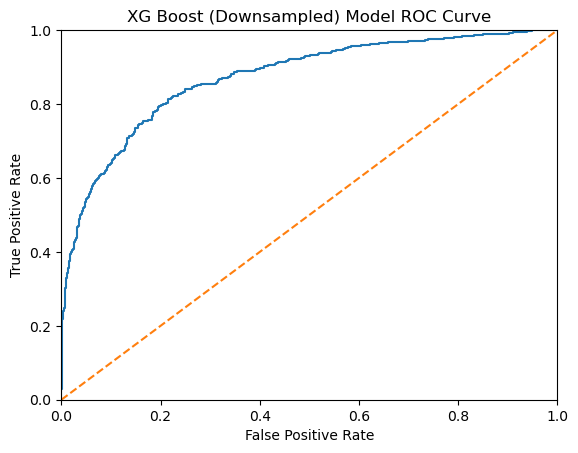

In [180]:
#Use the matplotlib library in order to make to plot the XG Boost (Downsampled) Model's ROC Curve.
#Use the fpr variable for the x axis and the tpr variable for the y axis.
plt.figure
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XG Boost (Downsampled) Model ROC Curve')
plt.show()

Chart Observation:
According to the chart above displaying the ROC Curve, the Downsampled XG Boost Model has the highest true positive rate of 90 percent at the cost of having a false positive rate of 60 percent.  At a False Positive Rate of around 20 percent, the model has a True Positive Rate of around 80 percent which is a better ratio.  The area under the curve for this model's ROC curve is a decent size.

### Overall Conclusion:
Out of all the other models, the XG Boost Model which used the downsampling technique generated the best F1 score.  For this task, I can conclude that downsampling was more effictive and generated better F1 scores than: leaving the class imbalance as is, adjusting the threhold, or upsampling.  The class imbalance of: appoximately 80:20, with the 0 class being the majority class needed to be addressed in order to generate the most accurate results from a model.  The Downsampled XG Boost model has the highest F1 score of all the other models and also had a good AUC-ROC score and a good area under the curve.